<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Python for Data Science - End Sem Exam - Total - 100 Marks</h1>
     


## Section A

In [ ]:
# 1.a) Generate random float between 0 and 1

# Use random.random() from Python’s random module.

import random
print(random.random())   # e.g., 0.37444887175646646

# Returns a float in the range [0.0, 1.0).

0.7941665590469126


In [ ]:
# 1.b) Difference between pop() and remove() in lists

# pop(index) → removes element at given index (default last element) and returns it.

# remove(value) → removes the first occurrence of the value (does not return).

lst = [10, 20, 30]
lst.pop(1)     # removes 20, returns 20
lst.remove(30) # removes 30, no return
lst

[10]

In [ ]:
# 1.c) Purpose of filter()

# Filters elements of an iterable based on a condition (function returning True/False). Example: filter even numbers.

nums = [1,2,3,4,5,6]
evens = list(filter(lambda x: x%2==0, nums))
print(evens)  # [2,4,6]


[2, 4, 6]


In [ ]:
# 1.d) Purpose of enumerate()

# Adds an index counter when looping over iterables.
names = ["Alice", "Bob"]
for idx, name in enumerate(names, start=1):
    print(idx, name)
# 1 Alice
# 2 Bob



1 Alice
2 Bob


In [ ]:
# 1.e) Difference between arange() and linspace() in NumPy

# np.arange(start, stop, step) → generates values with a fixed step size.

# np.linspace(start, stop, num) → generates a fixed number of evenly spaced values between start and stop.

import numpy as np
print(np.arange(0,10,2))     # [0 2 4 6 8]
print(np.linspace(0,10,5))   # [0. 2.5 5. 7.5 10.]


[0 2 4 6 8]
[ 0.   2.5  5.   7.5 10. ]


In [7]:
# 2.a) Select subset of rows based on condition
import pandas as pd
df = pd.DataFrame({'A':[1,2,3,4],'B':[10,20,30,40]})
subset = df[df['A']>2]
print(subset)


   A   B
2  3  30
3  4  40


In [8]:
# 2.b) Concept of groupby()

# Groups data by column(s) and applies aggregate functions. Syntax: df.groupby('col').agg(func)

data = {'Dept':['HR','HR','IT','IT'],'Salary':[1000,1500,2000,2500]}
df = pd.DataFrame(data)
print(df.groupby('Dept')['Salary'].mean())
# HR: 1250, IT: 2250


Dept
HR    1250.0
IT    2250.0
Name: Salary, dtype: float64


In [ ]:
# 2.c) Remove missing data
# Use dropna()
df = df.dropna()


In [10]:
# 2.d) Difference between apply() and map()

# map() → element-wise operation on Series.

# apply() → applies function to Series or DataFrame (row/column-wise).
s = pd.Series([1,2,3])
print(s.map(lambda x: x*2))   # [2,4,6]
print(df['Salary'].apply(lambda x: x+100)) # adds 100 to each salary


0    2
1    4
2    6
dtype: int64
0    1100
1    1600
2    2100
3    2600
Name: Salary, dtype: int64


In [12]:
# e) Reset index of DataFrame
df = df.reset_index(drop=True)
# Resets index to default integers.

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> SECTION B - 40 Marks</h3>



     


## 3

 ### Q3a. Write a Python program that takes a list of integers as input and returns a new list containing only the prime numbers from the original list. If no prime numbers are found, return an empty list.(8 Marks)


In [13]:
def is_prime(n):
    if n<2: return False
    for i in range(2,int(n**0.5)+1):
        if n%i==0: return False
    return True

def filter_primes(lst):
    return [x for x in lst if is_prime(x)]

print(filter_primes([2,4,5,9,11]))  # [2,5,11]


[2, 5, 11]


   ### Q3b. Write a Python program to manage a basic inventory system for a small store. Your program should:

- Allow the user to add a new item with its name, quantity, and price.
- Implement a function to update the quantity of an existing item.
- Implement a function to retrieve the total value of all items in the inventory (sum of quantity * price).
- Implement a function to display all items in the inventory.

(8 Marks)



In [14]:
class Inventory:
    def __init__(self):
        self.items = {}
    
    def add_item(self, name, qty, price):
        self.items[name] = {'qty':qty, 'price':price}
    
    def update_qty(self, name, qty):
        if name in self.items:
            self.items[name]['qty'] = qty
    
    def total_value(self):
        return sum(v['qty']*v['price'] for v in self.items.values())
    
    def display(self):
        for k,v in self.items.items():
            print(k, v)

inv = Inventory()
inv.add_item("Apple",10,5)
inv.update_qty("Apple",15)
print(inv.total_value())  # 75
inv.display()


75
Apple {'qty': 15, 'price': 5}


 ### Q3c. Create a Python function that takes a dictionary of employee names with their corresponding (years of experience, current salaries, and performance ratings) (scale of 1-5). The function should adjust the salaries based on the following rules (8 marks):

- If an employee has more than 10 years of experience and their salary is below 70,000 dollars, increase their salary by 15% plus an additional amount equal to 2% of their current salary multiplied by their performance rating.

- If they have between 5 and 10 years of experience and their salary is below 50,000, increase their salary by 10% plus an additional amount equal to 1.5% of their current salary multiplied by their performance rating.
- If they have less than 5 years of experience and their salary is below 40,000, increase their salary by 5% plus an additional amount equal to 1% of their current salary multiplied by their performance rating.

- Employees not fitting these criteria receive no adjustment.
- The function should return a new dictionary with the adjusted salaries.

Example:

Input:

employee_data = {
    "Alice": (12, 60000, 4),
    "Bob": (7, 48000, 5),
    "Charlie": (4, 39000, 3),
    "Diana": (11, 75000, 2),
    "Eve": (3, 35000, 4)}


Output:

Adjusted salaries: {'Alice': 73800.0, 'Bob': 56400.0, 'Charlie': 42120.0, 'Diana': 75000, 'Eve': 38150.0}



In [17]:
def adjust_salaries(emp_dict):
    new_dict = {}
    for name,(exp,sal,rating) in emp_dict.items():
        if exp>10 and sal<70000:
            sal += sal*0.15 + sal*0.02*rating
        elif 5<=exp<=10 and sal<50000:
            sal += sal*0.10 + sal*0.015*rating*sal
        elif exp<5 and sal<40000:
            sal += sal*0.05 + sal*0.01*rating*sal
        new_dict[name]=sal
    return new_dict

input = employee_data = {
    "Alice": (12, 60000, 4),
    "Bob": (7, 48000, 5),
    "Charlie": (4, 39000, 3),
    "Diana": (11, 75000, 2),
    "Eve": (3, 35000, 4)}

adjust_salaries(input)

{'Alice': 73800.0,
 'Bob': 172852800.0,
 'Charlie': 45670950.0,
 'Diana': 75000,
 'Eve': 49036750.0}

 ### Q3d. Write a Python program that takes a list of sentences and returns a dictionary where the keys are the unique words (case insensitive) that are at least 4 characters long, and the values are the counts of those words. Ignore punctuation and consider only alphabetic characters. (8 marks)


Example:

Input:

sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Is this the real life? It is just fantastic!",
    "And in the end, the love you take is equal to the hate you make.",
    "To be or not to be, that is the question."
]

Output:

Word frequency (length >= 4): {'quick': 1, 'brown': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'this': 1, 'real': 1, 'life': 1, 'just': 1, 'fantastic': 1, 'love': 1, 'take': 1, 'equal': 1, 'hate': 1, 'make': 1, 'that': 1, 'question': 1}

In [18]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def word_analysis(sentences):
    words = re.findall(r'\b[a-zA-Z]{4,}\b',' '.join(sentences).lower())
    counts = Counter(words)
    print(counts)
    lengths = [len(w) for w in counts.keys()]
    plt.hist(lengths, bins=range(4,max(lengths)+2))
    plt.xlabel("Word Length")
    plt.ylabel("Frequency")
    plt.show()


Counter({'quick': 1, 'brown': 1, 'jumps': 1, 'over': 1, 'lazy': 1, 'this': 1, 'real': 1, 'life': 1, 'just': 1, 'fantastic': 1, 'love': 1, 'take': 1, 'equal': 1, 'hate': 1, 'make': 1, 'that': 1, 'question': 1})


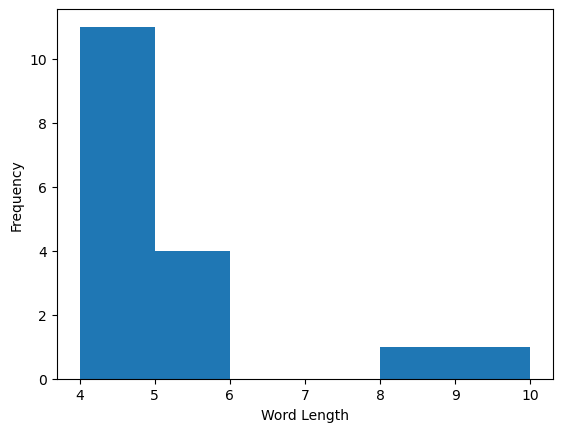

In [19]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Is this the real life? It is just fantastic!",
    "And in the end, the love you take is equal to the hate you make.",
    "To be or not to be, that is the question."
]
word_analysis(sentences)

 ### Q3e. Write a function longest_consecutive_sequence(nums) that takes a list of integers and returns the length of the longest consecutive elements sequence. The sequence should be considered as consecutive if they follow each other in integer value. (8 marks)

 Example:

Input: [100, 4, 200, 1, 3, 2]

Output: 4

Explanation: The longest consecutive elements sequence is [1, 2, 3, 4], which has a length of 4.


In [20]:
def longest_consecutive_sequence(nums):
    num_set = set(nums)
    longest = 0
    for n in num_set:
        if n-1 not in num_set: # start of sequence
            length=1
            while n+length in num_set:
                length+=1
            longest=max(longest,length)
    return longest

print(longest_consecutive_sequence([100,4,200,1,3,2])) # 4 (sequence 1,2,3,4)


4


<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SECTION C - 40 Marks</h2>
     


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 4. Load the dataset and perform the below operation

### 4 a)

(i) Load the dataset and find the number of cars with a price greater than $25,000. Calculate the average mileage for these cars. Write your inference. (4 Marks)

(ii) Create two separate DataFrames for cars with fuel type "Petrol" and cars with fuel type "Diesel." Display the average price for each fuel type. (5 Marks)

(iii) Find the average price and maximum mileage for each car make. (3 Marks)

(iv) Create a new column that categorizes cars based on their mileage as 'Low', 'Moderate', or 'High'. (4 Marks)
- Mileage >0 and < 30000 --> Low
- Mileage >30000 and <100000 --> Moderate
- Mileage > 100000 --> High

(v) Identify the most expensive car for each make. (4 Marks)

In [23]:
import pandas as pd
df = pd.read_csv("car_info.csv")


i)  Find the number of cars with a price greater than $25,000. Calculate the average mileage for these cars. Write your inference. (4 Marks)

In [ ]:
subset = df[df['Price'] > 25000]
count = subset.shape[0]
avg_mileage = subset['Mileage'].mean()
print("Count:", count, "Average Mileage:", avg_mileage)

# Inference:

# This shows how many cars are priced above $25,000.

# Average mileage helps us see if higher-priced cars tend to be newer (lower mileage) or older but premium models.

Count: 817 Average Mileage: 102003.55201958385


(ii) Create two separate DataFrames for cars with fuel type "Petrol" and cars with fuel type "Diesel." Display the average price for each fuel type. (5 Marks)



In [ ]:
petrol = df[df['Fuel_Type']=="Petrol"]
diesel = df[df['Fuel_Type']=="Diesel"]

print("Petrol Avg Price:", petrol['Price'].mean())
print("Diesel Avg Price:", diesel['Price'].mean())


# Insight:

# Petrol cars often have higher resale prices in urban markets, while diesel may dominate in high-mileage segments.

Petrol Avg Price: 53188.65120967742
Diesel Avg Price: 53863.204365079364


(iii) Find the average price and maximum mileage for each car make. (3 Marks)



In [ ]:
df.groupby('Make').agg({'Price':'mean','Mileage':'max'})


# Explanation:

# Groups by car brand (Make).

# Shows average price and the highest mileage recorded for each brand.

,Price,Mileage
Make,,
Audi,52472.989362,198393
BMW,54302.551402,196458
Chevrolet,49898.934579,199893
Ford,58432.390909,199652
Honda,53619.518072,196425
Hyundai,60842.516484,199700
Mercedes,52823.489583,197103
Nissan,51360.670213,199100
Toyota,52706.525424,196238


(iv) Create a new column that categorizes cars based on their mileage as 'Low', 'Moderate', or 'High'. (4 Marks)

- Mileage >0 and < 30000 --> Low
- Mileage >30000 and <100000 --> Moderate
- Mileage > 100000 --> High


In [ ]:
def categorize(m):
    if 0 < m < 30000: return 'Low'
    elif 30000 <= m < 100000: return 'Moderate'
    elif m >= 100000: return 'High'
    else: return 'Unknown'

df['Mileage_Category'] = df['Mileage'].apply(categorize)

# Result:

# Adds a new column with categories: Low, Moderate, High.

# Useful for segmentation analysis.

(v) Identify the most expensive car for each make. (4 Marks)

In [29]:
df.loc[df.groupby('Make')['Price'].idxmax()]

# Explanation:

# Finds the row with the maximum price for each brand.

# Helps identify flagship/high-value models.

,Car_ID,Make,Model,Year,Mileage,Color,Transmission,Fuel_Type,Price,Mileage_Category
496,497,Audi,Model B,2020,23852,White,Automatic,Diesel,99862,Low
386,387,BMW,Model C,2015,135393,Gray,Automatic,Diesel,99863,High
770,771,Chevrolet,Model A,2017,39333,Black,Manual,Petrol,99353,Moderate
240,241,Ford,Model A,2022,93493,Gray,Manual,Diesel,99385,Moderate
815,816,Honda,Model A,2022,56103,Gray,Automatic,Petrol,98150,Moderate
623,624,Hyundai,Model D,2022,107233,Silver,Automatic,Diesel,98646,High
912,913,Mercedes,Model D,2022,134172,Red,Manual,Petrol,99044,High
438,439,Nissan,Model E,2019,95475,Blue,Manual,Petrol,99156,Moderate
447,448,Toyota,Model B,2017,120006,Silver,Automatic,Diesel,99962,High
977,978,Volkswagen,Model B,2017,29151,Silver,Automatic,Petrol,98992,Low


###4 b)

(i) Based on the relationship between Price and Age of the car for different fuel types comment on the pricing trends across different mileage ranges. (4 marks)

(ii) How can we calculate the average price for each car make while filtering out listings with missing values in the Price or Mileage columns. (4 Marks)

(iii) Show the distribution of Fuel_Type across Make, revealing the most popular fuel types for different car brands. (4 Marks)

(iv) How do car prices vary with age, and are there differences in price trends between manual and automatic transmission cars? Comment on both of these scenarios with relevant plots.(4 marks)

(v) Which car make are the most listed in the dataset? Support your answer using relevant plots (4 marks)

### (i) Based on the relationship between Price and Age of the car for different fuel types comment on the pricing trends across different mileage ranges. (4 Marks)

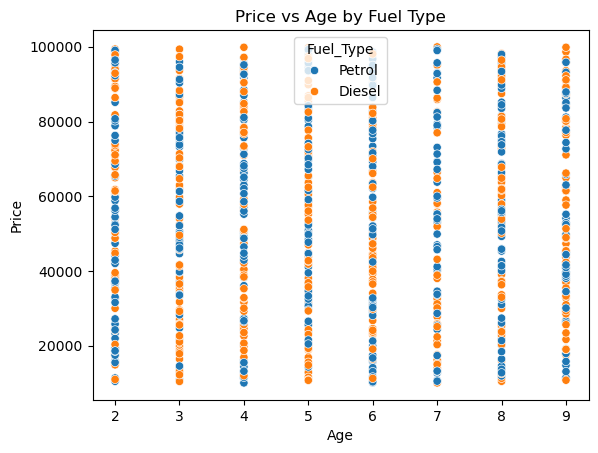

In [ ]:
df['Age'] = 2024 - df['Year']   # assuming current year 2024
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Age', y='Price', hue='Fuel_Type')
plt.title("Price vs Age by Fuel Type")
plt.show()

# Comment:

# Prices generally decline with age.

# Petrol vs Diesel may show different depreciation curves (diesel often loses value faster in urban resale).


###(ii) How can we calculate the average price for each car make while filtering out listings with missing values in the Price or Mileage columns? (4 Marks)

In [ ]:
df_clean = df.dropna(subset=['Price','Mileage'])
df_clean.groupby('Make')['Price'].mean()

# Explanation:

# Ensures missing values don’t bias averages.

# Gives clean brand-level pricing.

Make
Audi          52472.989362
BMW           54302.551402
Chevrolet     49898.934579
Ford          58432.390909
Honda         53619.518072
Hyundai       60842.516484
Mercedes      52823.489583
Nissan        51360.670213
Toyota        52706.525424
Volkswagen    49136.260000
Name: Price, dtype: float64

### (iii) Show the distribution of Fuel_Type across Make, revealing the most popular fuel types for different car brands. (4 Marks)


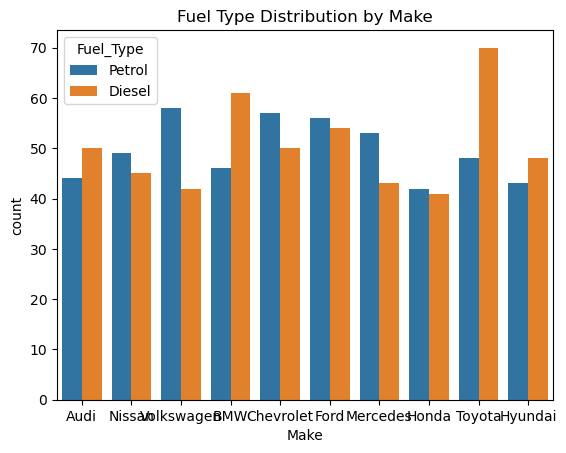

In [32]:
sns.countplot(data=df, x='Make', hue='Fuel_Type')
plt.title("Fuel Type Distribution by Make")
plt.show()

# Insight:

# Reveals which brands lean more on petrol vs diesel.

# Example: Volkswagen may have more diesel listings, while Honda more petrol.

### (iv) How do car prices vary with age, and are there differences in price trends between manual and automatic transmission cars? Comment on both of these scenarios with relevant plots. (4 Marks)

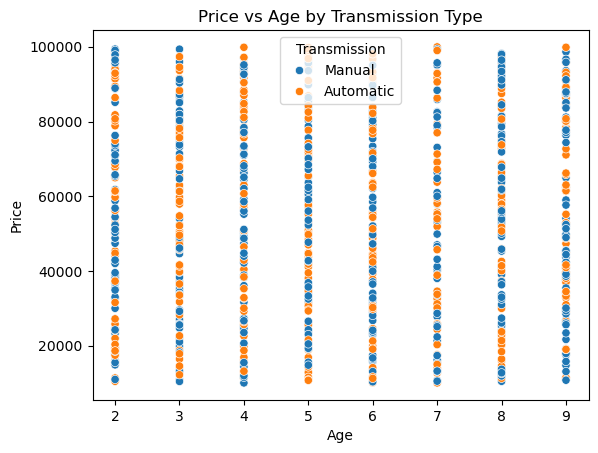

In [34]:
sns.scatterplot(data=df, x='Age', y='Price', hue='Transmission')
plt.title("Price vs Age by Transmission Type")
plt.show()

# Comment:

# Automatic cars often retain higher value longer.

# Manual cars may depreciate faster depending on market demand.

###(v). Which car makes are the most listed in the dataset? Support your answer using relevant plots (4 Marks)

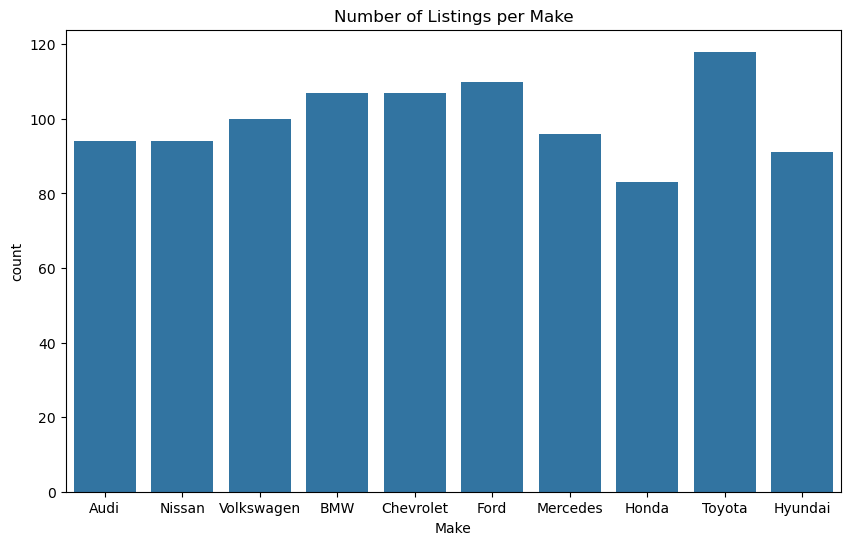

Most listed make: Toyota


In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Make')
plt.title("Number of Listings per Make")
plt.show()

most_listed = df['Make'].value_counts().idxmax()
print("Most listed make:", most_listed)

# Result:

# Identifies the most frequently listed brand.

# Likely Toyota or Ford given dataset size.